In [4]:
import tensorflow as tf
import os

2024-06-04 02:33:19.135187: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 02:33:19.170007: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 02:33:19.735605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1. Remove Dodgy Images

In [2]:
import cv2
import imghdr

/tmp/ipykernel_3356/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data'

In [14]:
print(os.listdir(os.path.join(data_dir, 'sad')))

['dark-depression-mood-people-wallpaper-preview2.jpg', 'images116.jpg', 'images162.jpg', 'images22.jpg', 'images175.jpg', 'image10.jpeg', 'images15.jpg', 'portrait-young-man-lonely-boring-sad-people-B2GTFD.jpg', 'images28.jpg', 'images117.jpg', 'images142.jpg', 'images21.jpg', '323277256.jpg', 'images165.jpg', 'a-lonely-and-sad-person-sitting-on-a-bench-created-with-generative-ai-technology-photo.jpg', 'images26.jpg', 'images145.jpg', 'images136.jpg', 'images62.jpg', 'images99.jpg', 'images46.jpg', 'image18.jpeg', 'nal-man-digital-illustration-transparent-background-person-sitting-thumbnail.png', 'images148.jpg', '960x0.jpg', 'vector3.svg', 'images27.jpg', 'images67.jpg', 'images92.jpg', 'depression-sad-mood-sorrow-dark-people-wallpaper-7.jpg', 'images35.jpg', 'images8.jpg', 'images111.jpg', 'image21.jpeg', 'image25.jpeg', 'images139.jpg', 'images171.jpg', 'images73.jpg', 'images80.jpg', '240_F_671059717_OAlmXdOfyZiunLuzQqCjZ4FBwa0NZCel.jpg', '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J6

In [24]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [25]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/sad/0c4ba40005f54fb49218add4c0b8df4c.webp
Image not in ext list data/sad/depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in ext list data/sad/depositphotos_11207956-stock-photo-thoughtful-man-in-the-living.jpg
Image not in ext list data/sad/39681222.jpg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list data/happy/depositphotos_208447156-stock-photo-young-happy-people-have-fun.jpg
Image not in ext list data/happy/depositphotos_8807359-stock-photo-mixed-race-man-smiling.jpg
Image not in ext list data/happy/traitshappypeople.jpg
Image not in ext list data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/7-Habits-of-Happy-People.png


## 2. Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 258 files belonging to 2 classes.


In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

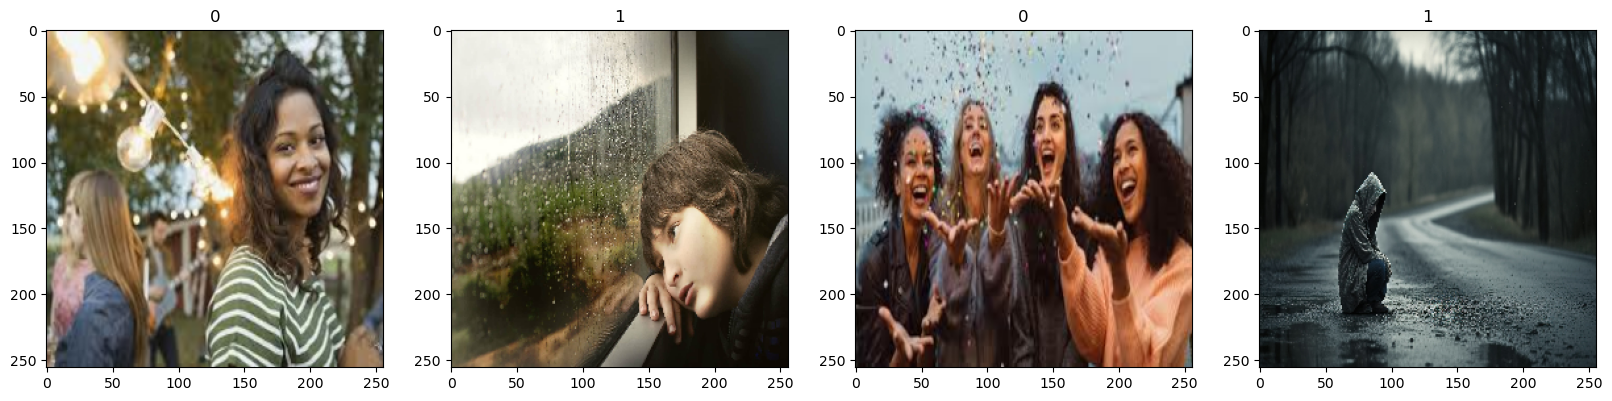

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. Scale Data

In [31]:
data = data.map(lambda x,y: (x/255,y))

In [32]:
scaled_iterator = data.as_numpy_iterator()

In [33]:
batch = scaled_iterator.next()

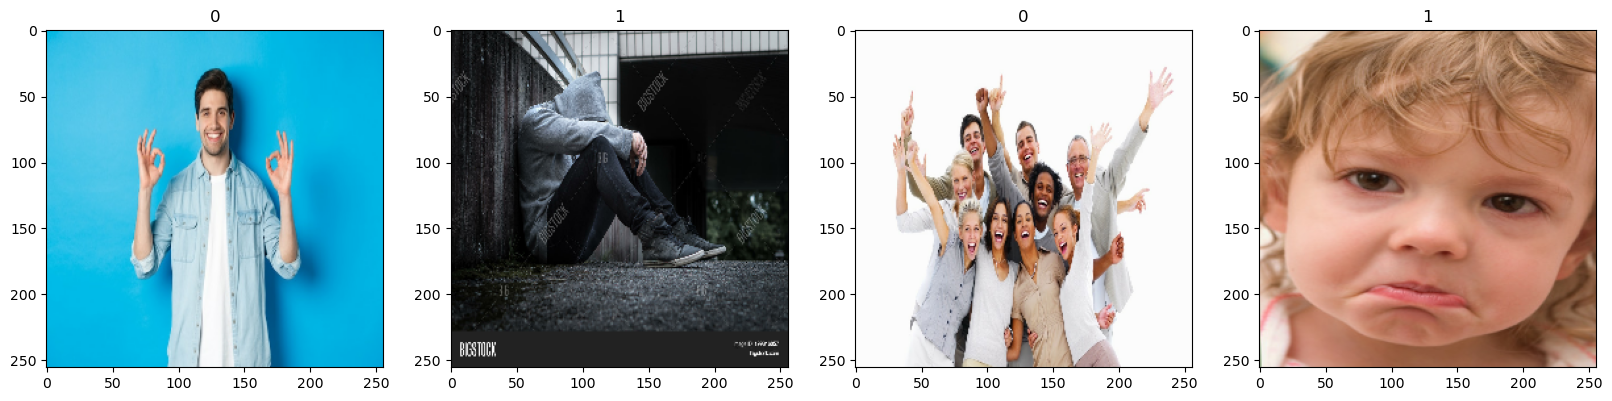

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

## 4. Split Data

In [40]:
len(data)

9

In [49]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [50]:
train_size

6

In [51]:
val_size

2

In [52]:
test_size

1

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 5. Build Model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [61]:
model = Sequential()

In [62]:
# Layer 1
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Layer 2
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer 3
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Train Data

In [65]:
logdir='logs'

In [66]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 633ms/step - accuracy: 0.4922 - loss: 1.9214 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5645 - loss: 0.7050

2024-06-04 03:53:16.141814: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.5672 - loss: 0.7062 - val_accuracy: 0.6406 - val_loss: 0.6328
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 521ms/step - accuracy: 0.6300 - loss: 0.6226 - val_accuracy: 0.7188 - val_loss: 0.5338
Epoch 4/20


2024-06-04 03:53:20.191508: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6639 - loss: 0.6028

2024-06-04 03:53:23.149827: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.6643 - loss: 0.6038 - val_accuracy: 0.5938 - val_loss: 0.6147
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6468 - loss: 0.5725

2024-06-04 03:53:26.767540: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.6474 - loss: 0.5707 - val_accuracy: 0.8281 - val_loss: 0.5142
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 584ms/step - accuracy: 0.7371 - loss: 0.5230 - val_accuracy: 0.7969 - val_loss: 0.4436
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 659ms/step - accuracy: 0.8197 - loss: 0.4692 - val_accuracy: 0.7812 - val_loss: 0.4438
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 637ms/step - accuracy: 0.8669 - loss: 0.3942 - val_accuracy: 0.7812 - val_loss: 0.4748
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.8766 - loss: 0.3757 - val_accuracy: 0.7188 - val_loss: 0.6012
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 0.7664 - loss: 0.4672 - val_accuracy: 0.7969 - val_loss: 0.4015
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.8766 - loss: 0.3358 - val_accuracy: 0.9219 - val_loss: 0.2168
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.8937 - loss: 0.3032 - val_accuracy: 0.9219 - val_loss: 0.2450


## 7. Plot Performance

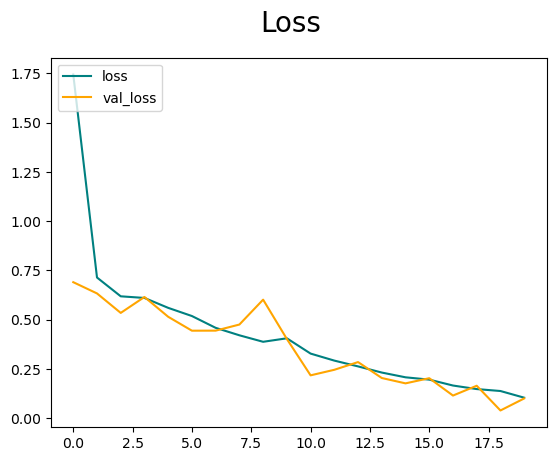

In [68]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

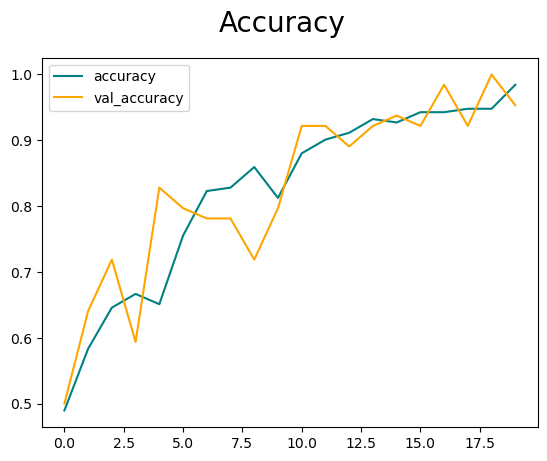

In [69]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 8. Eval

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [85]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


2024-06-04 04:03:58.049435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [86]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 9.Test

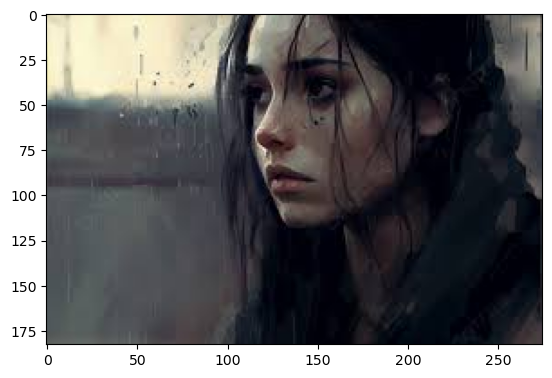

In [7]:
img = cv2.imread('sadTest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

NameError: name 'tf' is not defined

In [96]:
test = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [97]:
test

array([[0.9669053]], dtype=float32)

In [98]:
if test > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## 9. Save the Model

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('models','imageclassifier.h5'))

In [103]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [104]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[0.9669053]], dtype=float32)